In [17]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import fft
from matplotlib import rc
from matplotlib.pyplot import cm
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from scipy import signal
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from random import randint
from scipy.signal import find_peaks

In [19]:
def FreqSplit(spectrum,llim,rlim):
    window = np.zeros((spectrum.shape[-1]))
    window[llim:rlim] = 1.0
    
    signal = np.fft.ifftshift(spectrum*window)
    signal = np.fft.ifft(signal)
    return np.sqrt((signal.real)**2 + (signal.imag)**2)

In [20]:
def Signal(folder):
    path = "./" + str(folder) + "/"
    t = np.genfromtxt(path + "datat.txt")
    Mx = np.genfromtxt(path + "dataMx.txt")
    My = np.genfromtxt(path + "dataMy.txt")
    Mz = np.genfromtxt(path + "dataMz.txt")
    return t, Mx, My, Mz, np.sqrt(Mx**2 + My**2)

In [21]:
def Signal_1(folder):
    path = "./" + str(folder) + "/"
    Mx = np.genfromtxt(path + "dataMx.txt")
    My = np.genfromtxt(path + "dataMy.txt")
    Mz = np.genfromtxt(path + "dataMz.txt")
    return np.sqrt(Mx**2 + My**2)

In [39]:
def Spectrum(t,Mx,My):
    M = Mx + 1j * My
    if False:
        M = M[150000:300000]
    dt = t[1] - t[0]
    fs = 1.0/dt
    freq = np.linspace(-fs/2,fs/2,M.shape[-1])
    spec = np.fft.fft(M)
    spec = np.fft.fftshift(spec)
    if False:
        spec = np.absolute(spec)
    return freq, spec

In [40]:
if False:
    V = 14
    for i in range(V):
        locals()["t"+str(i+1)],locals()["Mx"+str(i+1)],locals()["My"+str(i+1)],locals()["Mz"+str(i+1)],locals()["Mabs"+str(i+1)] = Signal(i+1)

    for i in range(V):
        locals()["freq"+str(i+1)], locals()["spec"+str(i+1)] = Spectrum(locals()["t"+str(i+1)],locals()["Mx"+str(i+1)],locals()["My"+str(i+1)])
else:
    D = np.asarray([208,210]) 
    #D = np.linspace(200,211,12, endpoint=True,dtype=np.int64)
    print("D = ", D)
    for i in D:
        locals()["t"+str(i)],locals()["Mx"+str(i)],locals()["My"+str(i)],locals()["Mz"+str(i)],locals()["Mabs"+str(i)] = Signal(i)

    for i in D:
        locals()["freq"+str(i)], locals()["spec"+str(i)] = Spectrum(locals()["t"+str(i)],locals()["Mx"+str(i)],locals()["My"+str(i)])    

        

D =  [208 210]


In [ ]:
#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']

In [24]:
colors = []

for i in range(D.shape[-1]):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

In [25]:
colorsHex = ['#8c0304', '#04039a', '#fe0600', '#fe9a00']
# https://www.w3schools.com/colors/colors_hexadecimal.asp

<IPython.core.display.Javascript object>


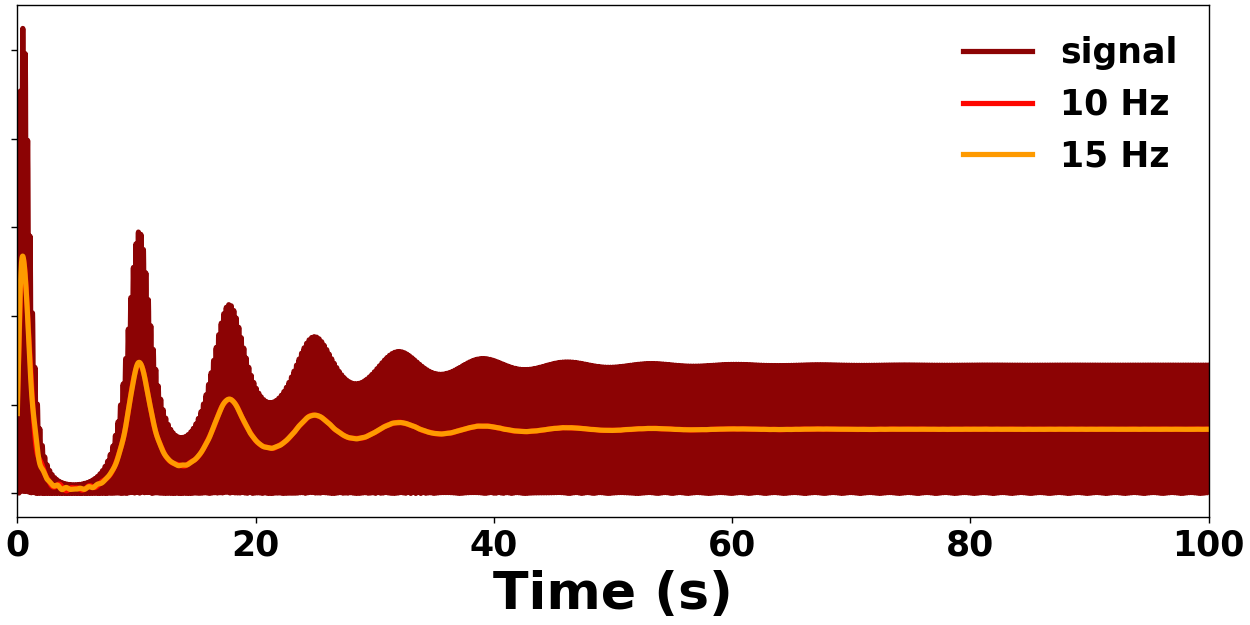

In [38]:
rc('font', weight='bold')
fig = plt.figure(constrained_layout=True, figsize=(10,5))
spec = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(spec[0, 0])

D3 = [208]
for i,j in zip(D3,colorsHex):
    ax1.plot(locals()["t"+str(i)],locals()["Mabs"+str(i)],linewidth=3.0,label = 'signal',color=colorsHex[0])
    ax1.plot(locals()["t"+str(i)],FreqSplit(locals()["spec"+str(i)],152800,153400),linewidth=3.0,label = '10 Hz',color=colorsHex[2])  # ,color='red'
    ax1.plot(locals()["t"+str(i)],FreqSplit(locals()["spec"+str(i)],154000,154800),linewidth=3.0,label = '15 Hz',color=colorsHex[3])

ax1.set_xlabel(r'Time (s)', fontsize=30, color='black',fontweight='bold', loc='center')
#ax1.set_ylabel(r'Spectrum', fontsize=30, color='black',fontweight='bold')
ax1.legend(fontsize=20,frameon=False)
ax1.tick_params(axis='both',labelsize=20)
#ax1.grid(True, linestyle='-.')
#ax1.ticklabel_format(axis='y',style='sci',scilimits=(1,1),useMathText=True)
#ax1.set_ylim(-6.2e6,2.279e8)
ax1.set_xlim(0,100)
#ax1.text(1.0, 200000, '(1a)', ha='center', fontsize=25, color='black',fontweight='bold')
ax1.set_yticklabels([])
#ax1.set_xticklabels([])

#plt.savefig('fig_rdcu_180_3.png',transparent=True)
plt.savefig('signal'+str(D3[-1])+'.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


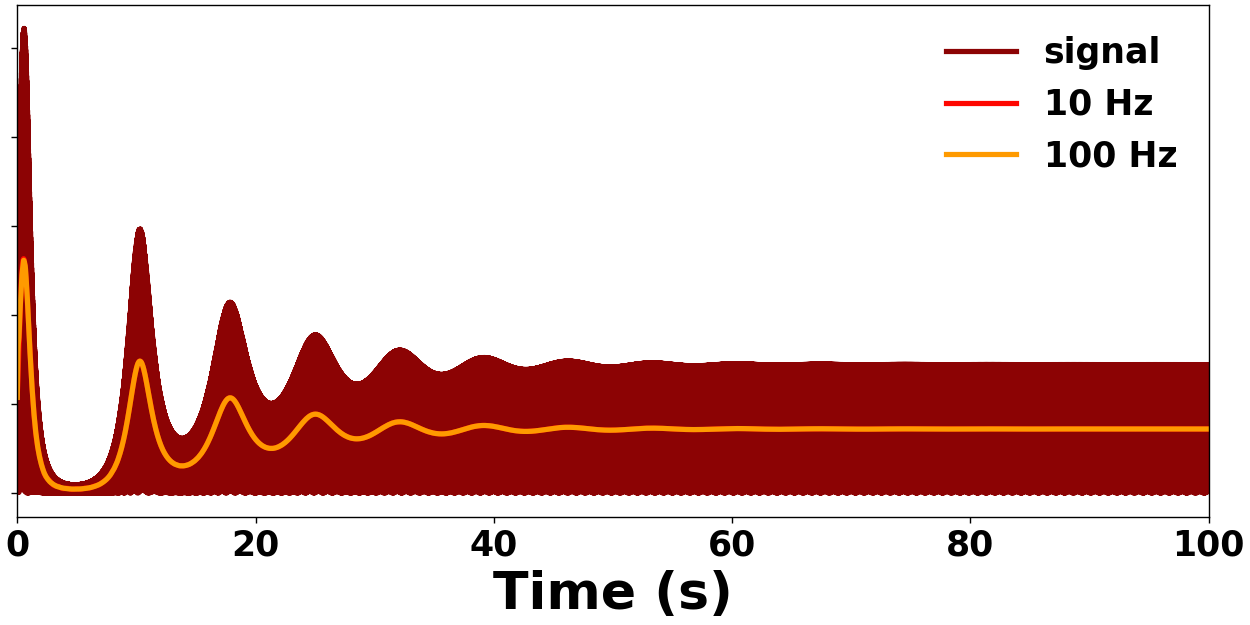

In [37]:
rc('font', weight='bold')
fig = plt.figure(constrained_layout=True, figsize=(10,5))
spec = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(spec[0, 0])

D3 = [210]
for i,j in zip(D3,colorsHex):
    ax1.plot(locals()["t"+str(i)],locals()["Mabs"+str(i)],linewidth=3.0,label = 'signal',color=colorsHex[0])
    ax1.plot(locals()["t"+str(i)],FreqSplit(locals()["spec"+str(i)],152600,153400),linewidth=3.0,label = '10 Hz',color=colorsHex[2])  # ,color='red'
    ax1.plot(locals()["t"+str(i)],FreqSplit(locals()["spec"+str(i)],178000,182000),linewidth=3.0,label = '100 Hz',color=colorsHex[3])

ax1.set_xlabel(r'Time (s)', fontsize=30, color='black',fontweight='bold', loc='center')
#ax1.set_ylabel(r'Spectrum', fontsize=30, color='black',fontweight='bold')
ax1.legend(fontsize=20,frameon=False)
ax1.tick_params(axis='both',labelsize=20)
#ax1.grid(True, linestyle='-.')
#ax1.ticklabel_format(axis='y',style='sci',scilimits=(1,1),useMathText=True)
#ax1.set_ylim(-6.2e6,2.279e8)
ax1.set_xlim(0,100)
#ax1.text(1.0, 200000, '(1a)', ha='center', fontsize=25, color='black',fontweight='bold')
ax1.set_yticklabels([])
#ax1.set_xticklabels([])

#plt.savefig('fig_rdcu_180_3.png',transparent=True)
plt.savefig('signal'+str(D3[-1])+'.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


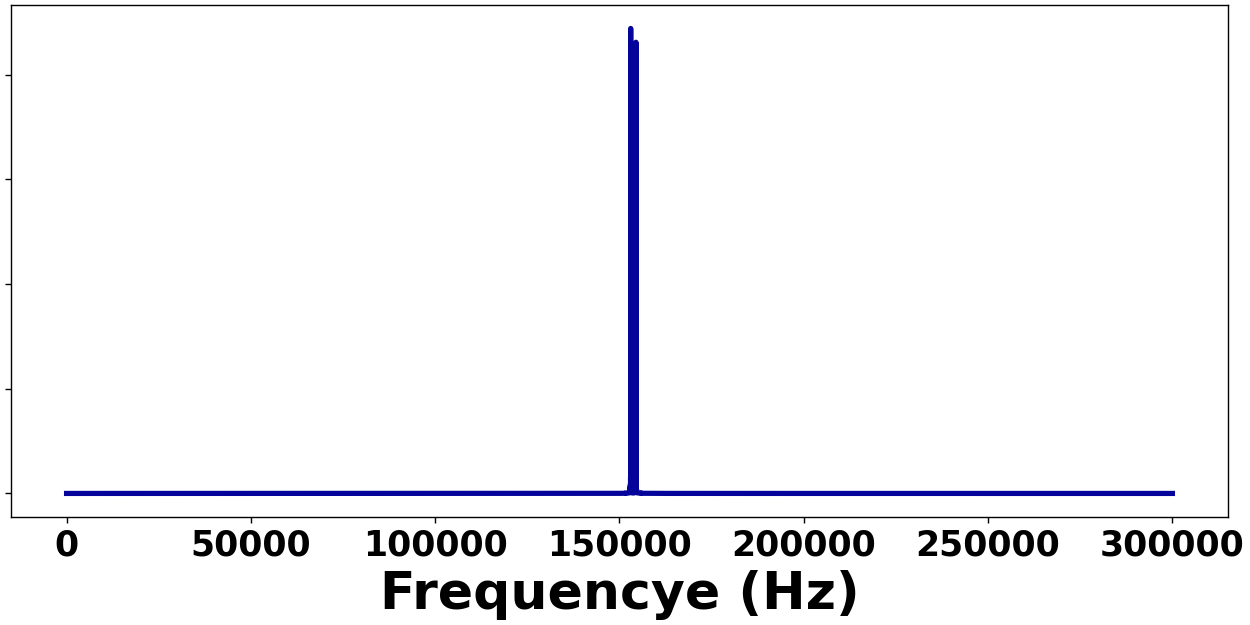

[Text(0, -20.0, ''),
 Text(0, 0.0, ''),
 Text(0, 20.0, ''),
 Text(0, 40.0, ''),
 Text(0, 60.0, ''),
 Text(0, 80.0, ''),
 Text(0, 100.0, '')]

In [28]:
rc('font', weight='bold')
fig = plt.figure(constrained_layout=True, figsize=(10,5))
spec = fig.add_gridspec(1, 1)

ax1 = fig.add_subplot(spec[0, 0])

D3 = [208]
for i,j in zip(D3,colors):
    #ax1.plot(locals()["freq"+str(i)], np.absolute(locals()["spec"+str(i)]),linewidth=3.0,label = str(i),color=colorsHex[1])  # ,color='red'
    ax1.plot(np.absolute(locals()["spec"+str(i)]),linewidth=3.0,label = str(i),color=colorsHex[1])

ax1.set_xlabel(r'Frequencye (Hz)', fontsize=30, color='black',fontweight='bold', loc='center')
#ax1.set_ylabel(r'Spectrum', fontsize=30, color='black',fontweight='bold')
#ax1.legend(fontsize=10,frameon=False)
ax1.tick_params(axis='both',labelsize=20)
#ax1.grid(True, linestyle='-.')
ax1.ticklabel_format(axis='y',style='sci',scilimits=(1,1),useMathText=True)
#ax1.set_ylim(-6.2e6,2.279e8)
#ax1.set_xlim(0,360)
#ax1.text(1.0, 200000, '(1a)', ha='center', fontsize=25, color='black',fontweight='bold')
ax1.set_yticklabels([])
#ax1.set_xticklabels([])

#plt.savefig('fig_rdcu_180_3.png',transparent=True)
#plt.savefig('spectrum'+str(D3[-1])+'.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


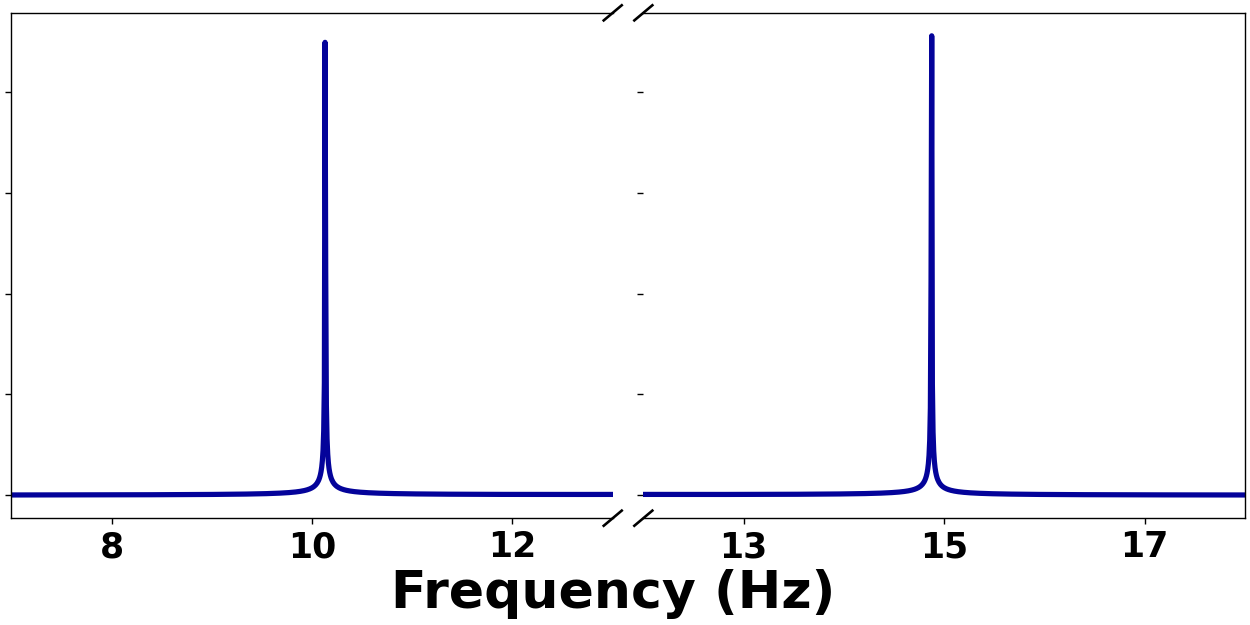

In [47]:
rc('font', weight='bold')
fig = plt.figure(constrained_layout=True, figsize=(10,5))
spec = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])

D3 = [208]
for i,j in zip(D3,colors):
    ax1.plot(locals()["freq"+str(i)], np.absolute(locals()["spec"+str(i)]),linewidth=3.0,label = str(i),color=colorsHex[1])  # ,color='red'
    ax2.plot(locals()["freq"+str(i)], np.absolute(locals()["spec"+str(i)]),linewidth=3.0,label = str(i),color=colorsHex[1])

#ax1.grid(True, linestyle='-.')
#ax2.grid(True, linestyle='-.')

ax1.set_xlim(7,13)
ax2.set_xlim(12,18)
ax1.tick_params(axis='both',labelsize=20)
ax2.tick_params(axis='both',labelsize=20)
ax1.ticklabel_format(axis='y',style='sci',scilimits=(1,1),useMathText=True)
#ax1.set_ylabel(r'Spectrum', fontsize=30, color='black',fontweight='bold')
ax1.set_xlabel(r'Frequency (Hz)', fontsize=30, color='black',fontweight='bold', loc='center')
ax1.xaxis.set_label_coords(1, -0.1)

# plt.xlabel(r'Frequencye (Hz)', fontsize=30, color='black',fontweight='bold', loc='center')

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax1.get_xaxis().set_ticks([8.0,10.0,12])
ax2.get_xaxis().set_ticks([13,15,17])

ax2.set_yticklabels([])
ax1.set_yticklabels([])

d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

plt.savefig('spectrum'+str(D3[-1])+'.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


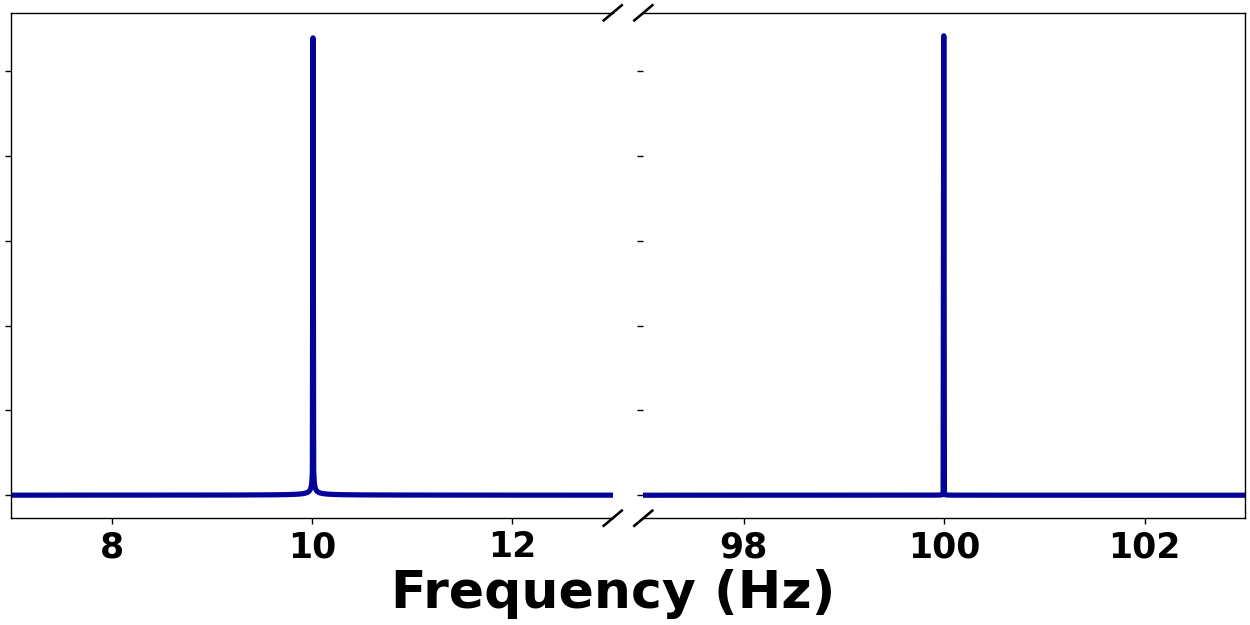

In [46]:
rc('font', weight='bold')
fig = plt.figure(constrained_layout=True, figsize=(10,5))
spec = fig.add_gridspec(1, 2)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])

D3 = [210]
for i,j in zip(D3,colors):
    ax1.plot(locals()["freq"+str(i)], np.absolute(locals()["spec"+str(i)]),linewidth=3.0,label = str(i),color=colorsHex[1])  # ,color='red'
    ax2.plot(locals()["freq"+str(i)], np.absolute(locals()["spec"+str(i)]),linewidth=3.0,label = str(i),color=colorsHex[1])

#ax1.grid(True, linestyle='-.')
#ax2.grid(True, linestyle='-.')

ax1.set_xlim(7,13)
ax2.set_xlim(97,103)
ax1.tick_params(axis='both',labelsize=20)
ax2.tick_params(axis='both',labelsize=20)
ax1.ticklabel_format(axis='y',style='sci',scilimits=(1,1),useMathText=True)
#ax1.set_ylabel(r'Spectrum', fontsize=30, color='black',fontweight='bold')
ax1.set_xlabel(r'Frequency (Hz)', fontsize=30, color='black',fontweight='bold', loc='center')
ax1.xaxis.set_label_coords(1, -0.1)

# plt.xlabel(r'Frequencye (Hz)', fontsize=30, color='black',fontweight='bold', loc='center')

ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax1.get_xaxis().set_ticks([8.0,10.0,12])
ax2.get_xaxis().set_ticks([98,100,102])

ax2.set_yticklabels([])
ax1.set_yticklabels([])

d = .015
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

plt.savefig('spectrum'+str(D3[-1])+'.pdf',bbox_inches='tight')